# **RAQUEL ALFONSO RODRÍGUEZ**

# Práctica 1: paralelismo cuántico

Utiliza el paralelismo cuántico para evaluar una función $f(x) = f(\{x_{n-1},x_{n-2},\ldots,x_0\}) \rightarrow \{0,1\}$, con $x_i \in \{0,1\}$, que verifique:

$$
f(x) =
\begin{cases}
1, \text{si } x \text{ es par}\\
0, \text{si } x \text{ es impar}\\
\end{cases}
$$

Crea un circuito en Qiskit para $n=2$.

### **SOLUCIÓN**

Tenemos una función que toma dos variables de entrada $x_1, x_2$ y devuelve una salida $f(x_1, x_2)$. Esto en qubits se traduce como un estado $|y x_1 x_2\rangle$ que se transforma en $|y \oplus f(x_1, x_2), x_1 x_2\rangle$. Por tanto, trabajaremos con una matriz asociada a $f(x)$ que tiene $2^3 \times 2^3$ elementos.

$$
U_{f} =
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\end{bmatrix}
$$

$f$ toma el valor $1$ si $x=x_1 x_2$ es par. Eso quiere decir que el qubit de control es $x_2$, pues si $x_2=0$, entonces $x$ es par y si $x_2=1$, $x$ es impar. Pondremos una negación en el qubit $x_2$ y una puerta CNOT para cambiar el valor de $y$ de manera acorde.

In [4]:
### PREÁMBULO ###
!pip install qiskit qiskit-aer pylatexenc

In [3]:
import numpy as np
from math import sqrt

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import plot_histogram

# Funciones auxiliares

# Función para simular y mostrar el vector de estado
def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    # Usamos el simulador de vector de estado
    # https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

# Funcion para obtener y mostrar la matriz unitaria
def obten_unitaria(qcirc, etiqueta):
    # Usamos el simulador de matriz unitaria
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

<IPython.core.display.Latex object>

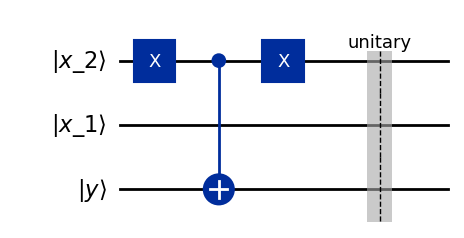

In [8]:
# Circuito cuántico

x2 = QuantumRegister(1, name="|x_2\\rangle")
x1 = QuantumRegister(1, name="|x_1\\rangle")
y = QuantumRegister(1, name="|y\\rangle")
qc = QuantumCircuit(x2, x1,y)

qc.x(x2)
qc.cx(x2,y)
qc.x(x2)    #deshacemos el cambio en x_2 para preservar su valor
qc.save_unitary()
obten_unitaria(qc, "U_{f} = ")
qc.draw('mpl')

In [9]:
# Hacemos también una función con el oráculo asociado a este circuito

# Oráculo para f
def f_oraculo():

    x2 = QuantumRegister(1, name="|x_2\\rangle")
    x1 = QuantumRegister(1, name="|x_1\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x2, x1,y)

    qc.x(x2)
    qc.cx(x2,y)
    qc.x(x2)

    oraculo = qc.to_gate()
    oraculo.name = "$U_{f}$"
    return(oraculo)

<IPython.core.display.Latex object>

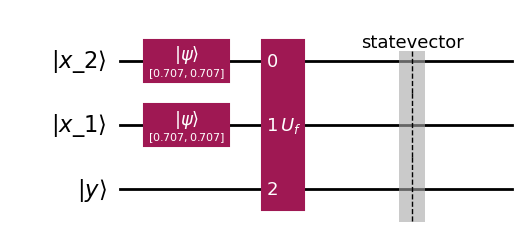

In [13]:
# Ponemos los qubits en superposición y comprobamos el oráculo

x2 = QuantumRegister(1, name="|x_2\\rangle")
x1 = QuantumRegister(1, name="|x_1\\rangle")
y = QuantumRegister(1, name="|y\\rangle")
qc = QuantumCircuit(x2, x1,y)

estado_mas = Statevector([1/sqrt(2), 1/sqrt(2)])
qc.initialize(estado_mas,x1)
qc.initialize(estado_mas,x2)

# Añadimos el oráculo
qc = qc.compose(f_oraculo())

#Indicamos que queremos ver el vector de estado en este punto
qc.save_statevector()
obten_estado(qc)
qc.draw('mpl')